<IPython.core.display.Javascript object>


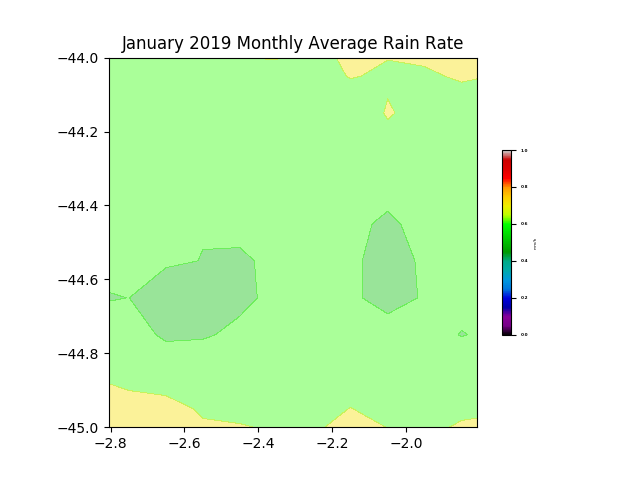

In [1]:
%matplotlib notebook
%matplotlib notebook

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import h5py as h5py
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from osgeo import gdal, osr

fig = plt.figure(dpi=100)

ax = plt.axes()

#ax.coastlines('10m')
#ax.gridlines()

extent = [-44.996, -44.009, -2.805, -1.809]

#ax.set_extent(extent)

In [2]:
# First: read the geotiff image with GDAL.

gdal.UseExceptions()

fname = './resources/T23MNT_20190525T132241_TCI_60m.jp2'

ds = gdal.Open(fname)
data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

# print('\n\n## ds ##:\n\n' + str(ds))
# print('\n\n## data ##:\n\n' + str(data))
# print('\n\n## gt ##:\n\n' + str(gt))
# print('\n\n## proj ##:\n\n' + str(proj))
# print('\n\n## inproj ##:\n\n' + str(inproj))

0

In [3]:
projcs = inproj.GetAuthorityCode('PROJCS')
# print('\n\n## projcs ##:\n\n' + str(projcs))

# image_projection = ccrs.epsg(projcs)
# print('\n\n## image_projection ##:\n\n' + str(image_projection))

In [4]:
img = plt.imread(fname)

In [5]:
#projection = ccrs.PlateCarree()

# fig = plt.figure(dpi=100)

ax = plt.axes()

#ax.coastlines('10m')
#ax.gridlines()

#ax.set_extent(extent, crs=ccrs.PlateCarree())
img = plt.imread(fname)
ax.imshow(img, extent=extent)

# mark a known place to help us geo-locate ourselves
ax.plot(-44.243317, -2.565823, 'bo', markersize=7, color='red')
ax.text(-44.23, -2.54, 'São Luíz', color='black', size=10)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(-44.23, -2.54, 'São Luíz')

In [6]:
# fig = plt.figure(dpi=100)

hdf5 = './resources/3B-MO.MS.MRG.3IMERG.20190101-S000000-E235959.01.V06A.HDF5'
dataset = h5py.File(hdf5,'r')

precip = dataset['Grid/precipitation'][:]
precip = np.transpose(precip[0])

theLats = dataset['Grid/lat'][:]
theLons = dataset['Grid/lon'][:]

clevs = np.arange(0,0.1,0.01)

x, y = np.float32(np.meshgrid(theLons, theLats))

masked_array = np.ma.masked_where(precip < 0,precip)

cmap = 'nipy_spectral'

plt.title('January 2019 Monthly Average Rain Rate')

font = {'weight' : 'bold', 'size' : 3}

plt.rc('font', **font)

plt.xlim(-2.805, -1.809)
plt.ylim(-45, -44)

ax = plt.axes()

cs = ax.contourf(x, y, precip, clevs, alpha=0.4, cmap=cmap)

sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(0,1))
sm._A = []
plt.colorbar(sm, ax=ax, label='mm/h', shrink=0.5)